# Credit Card Clustering

In this Notebbok I will demonstrate a simple clustering task on a credit card usage dataset from Kaggle. The purpose of clustering here is to extract and observe usage patterns among credit card users. 

[Data Source](https://www.kaggle.com/ainslie/credit-card-data-clustering-analysis "Kaggle")
You can look at the exact description of the columns there.

I will show the most important steps and the reason why they must be done along with a presentation of the results. 


In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA
from sklearn import mixture
import seaborn as sns

%matplotlib inline

In [220]:
inputData=pd.read_csv("credit_card_clustering.csv").set_index("CUST_ID")
inputData.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Using the describe method of a pandas DAtaframe we can get information on the features, this is a good starting point for any analysis. 

In [221]:
feature_columns=list(inputData.columns)
inputData.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [222]:
inputData.fillna(inputData.median(),inplace=True)

In the first line we can see that there are some missing values. These must be imputed before we go forward. I use the median here, but you can use other strategies as well, it always depends on the use case. I chose the median, since it works for all kinds of distributions, it does not matter of the distribution is skewed or asymmetrical, the median is usually a simple and good guess. 

## Clustering

Clustering is the easiest thing in the world. You can simply import the KMeans object from the sklearn library, fit it and apply it to the data, and you already have a clustering. 

For KMeans, you need to decide beforehand the number of clusters. I chose 5 as a start, but this decision will be reviewed later. 

4    5474
0    2455
2     847
1     118
3      56
Name: CLUSTERING_1, dtype: int64


Text(0, 0.5, 'PURCHASES')

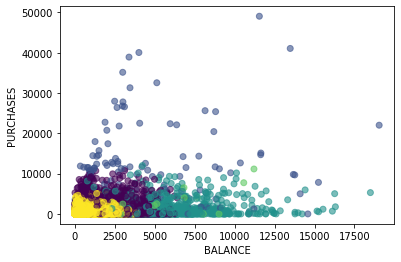

In [223]:
X=inputData.values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
inputData["CLUSTERING_1"]=kmeans.labels_
print(inputData["CLUSTERING_1"].value_counts())
plt.scatter(inputData["BALANCE"],inputData["PURCHASES"],c=inputData["CLUSTERING_1"],alpha=0.6)
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")

I plot the customers on a scatterplot with the 2 seemingly most important features and their cluster as the color. There are 2 apparent problems with this solution:

1. The cluster sizes are not equal. Most of the customers are in the 4 and 0 clusters. This is not a methodological problem, but usually in a business settings you wil not care about clusters of size 1% of all observations
2. The clusters are not well separated. There are ways to quantify this, but it is already apparent on this simple plot. 

To elaborate on the issue, I group the features according to their substantive meanings, and use one of my favorite tools, a boxplot to visualize the differences between the clusters.

C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds
C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds
C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds
C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds


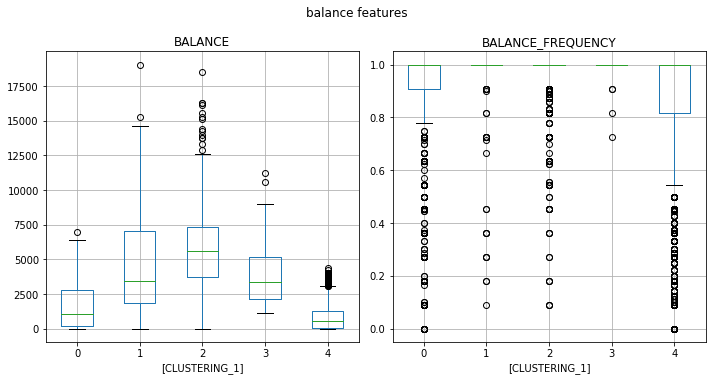

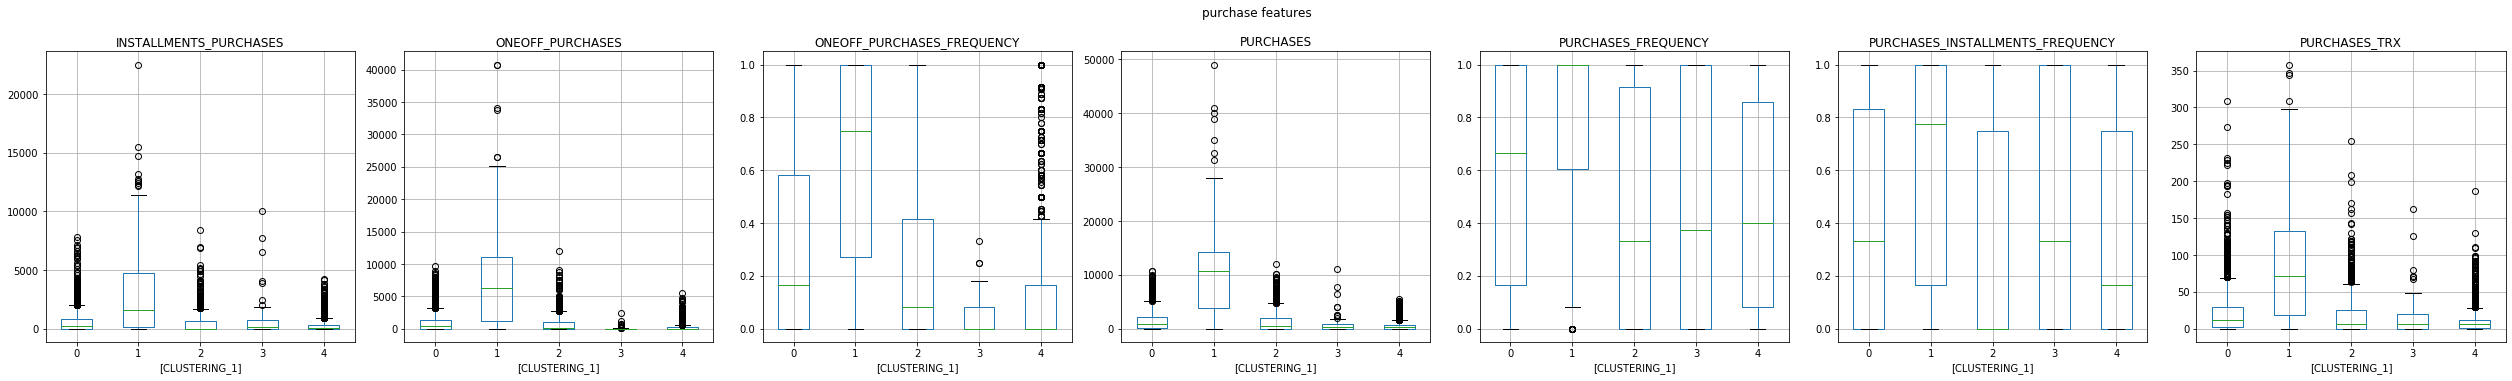

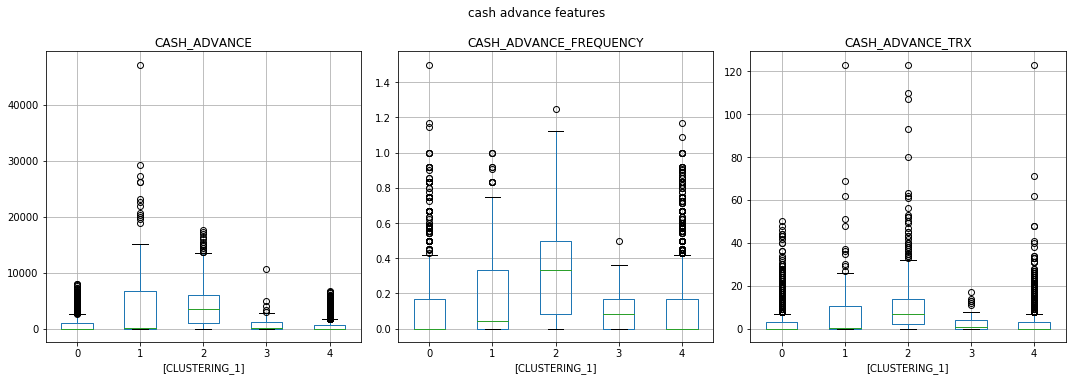

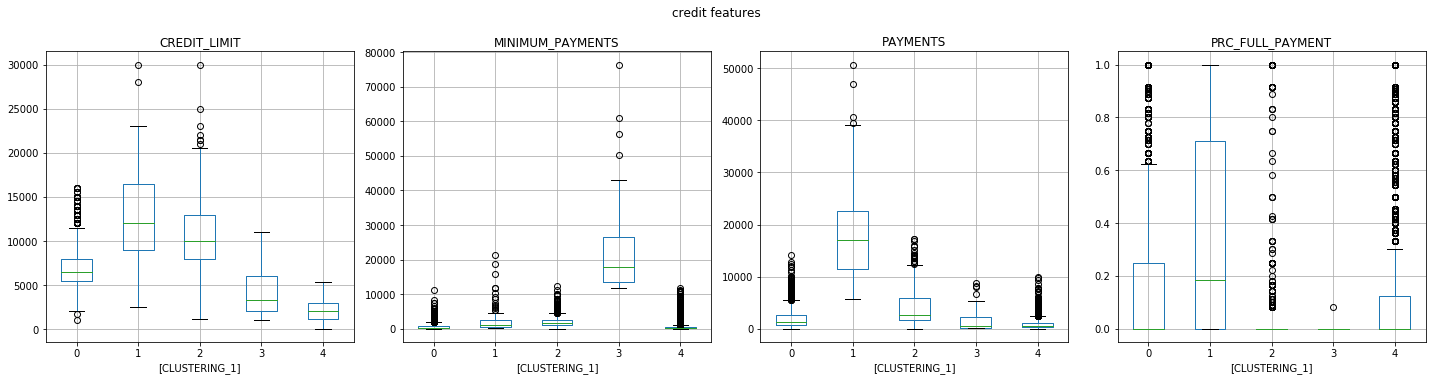

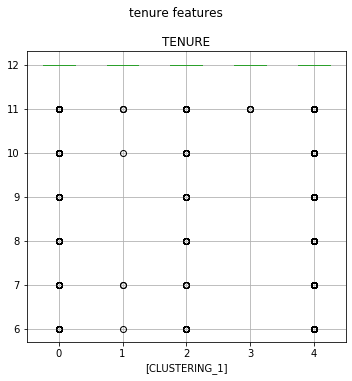

In [224]:
balance_features=["BALANCE","BALANCE_FREQUENCY"]
purchase_features=["PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY",\
                   "PURCHASES_INSTALLMENTS_FREQUENCY","PURCHASES_TRX"]
cash_advance_features=["CASH_ADVANCE","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX"]
credit_features=["CREDIT_LIMIT","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT"]
tenure_features=["TENURE"]
feature_groups = {
    "balance_features" : balance_features,
    "purchase_features": purchase_features,
    "cash_advance_features": cash_advance_features,
    "credit_features": credit_features,
    "tenure_features" : tenure_features,
}

def create_boxplot_for_feature_group(feature_group, group_name,inputData):
    
    fig, axs = plt.subplots(1,len(feature_group),figsize=(len(feature_group)*5,5))

    inputData[feature_group+["CLUSTERING_1"]].boxplot(by="CLUSTERING_1",ax=axs)
    fig.suptitle(group_name.lower().replace("_"," "),y=1.05)
    plt.tight_layout()
    
for name, group in feature_groups.items():
    create_boxplot_for_feature_group(group,name,inputData)

To make the problem more visible, lets separate the features based on their standard deviation.

C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds


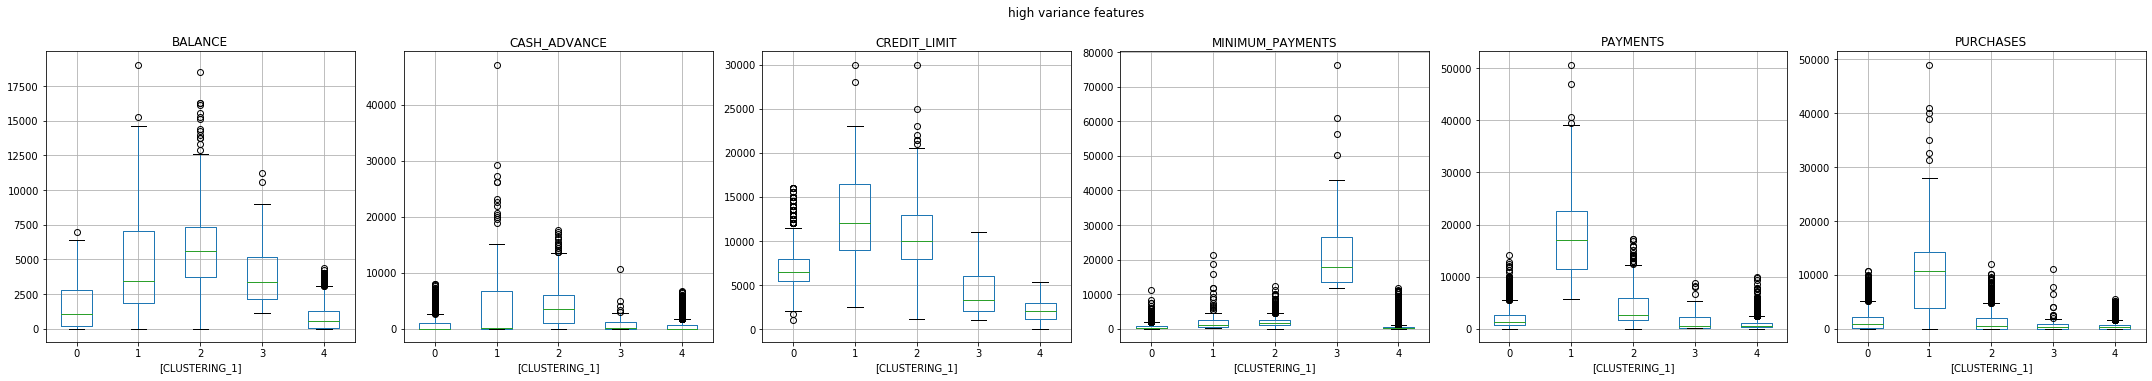

In [225]:
#separating features by standard deviation
high_stdev_features=[col for col in feature_columns if (inputData[col].std()>2000)]

low_stdev_features=[col for col in feature_columns if inputData[col].std()<2000]
create_boxplot_for_feature_group(high_stdev_features,"High Variance Features",inputData)

C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds


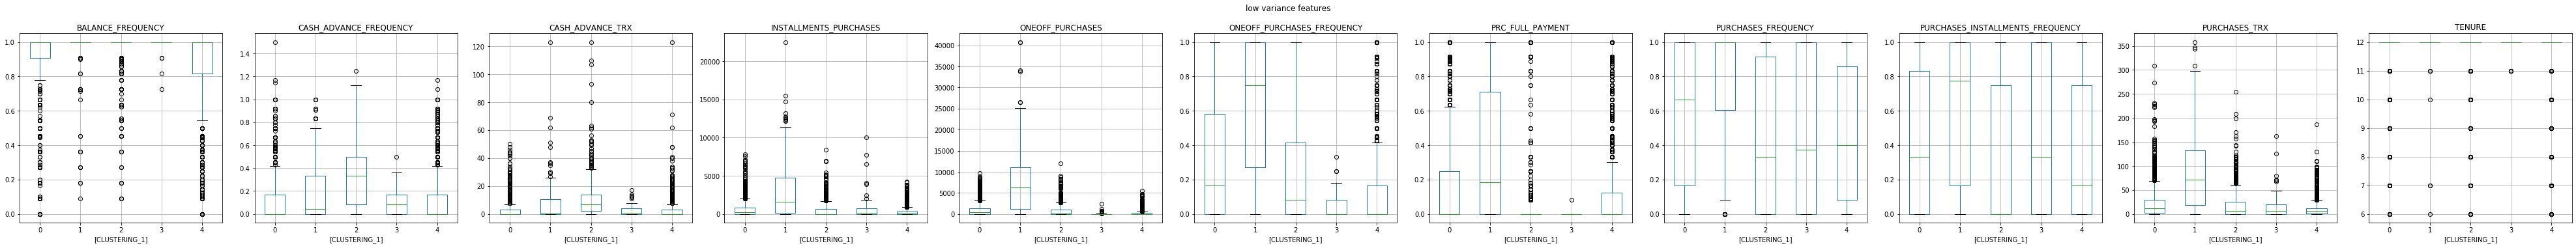

In [226]:
create_boxplot_for_feature_group(low_stdev_features,"Low Variance Features",inputData)

To elaborate, I am going to construct a toy dataset and cluster it the same way we did on the credit card data. One column will have a much greater variance then the other.

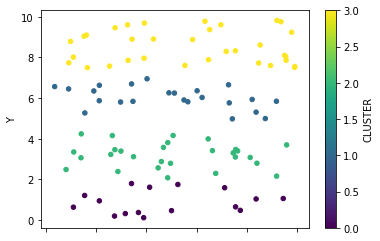

In [227]:
X=np.random.rand(100,2)
X[:,1]=X[:,1]*10
#now column 2 has stdev 10, column 1 has stdev 1
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
X = np.insert(X, 2, values=np.ravel(kmeans.labels_), axis=1) # Insert values before column 3
X_pd=pd.DataFrame(X,columns=["X","Y","CLUSTER"])
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis')


The solution here is that the feature that has a higher variance will dominate the clustering. If you do not specify otherwise, the KMeans clusterer will use Euclidean distance. Euclidean distance despite its fancy name is your regular everyday distance metric:

![Euclidean Distance](euclidean_distance.jpeg "Title")

This is not much of a clustering, is it? If we do not adjust for variance, then the clusterer will only consider high variance features such as Balance, and will completely disregard features such as Balance Frequency.

There are two ways to deal with this: Scaling and Normalizing. 

Scaling means that we map the largest value to 1 and the lowest value to 0 in every feature, while in normalizing we subtract the mean and divide by the standard deviation. If we use scaling, then outliers can be a big problem. If you feature is 98 cases of 1, 1 case of 50 and 1 case of 1000, then 1000 will be mapped to 1, 50 will be mapped to 0.05 and all the ones will be mapped to 0. The clusterer will think that 50 belongs to the same group as all the 1s, while in most real world cases you will want to treat 50 different from the 1s. 

So I will go with normalizing in this case.

In [228]:
inputData.drop("CLUSTERING_1",inplace=True,axis=1)
inputDataNormalized=(inputData-inputData.mean())/inputData.std()
inputDataNormalized.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960325,-0.528949,-0.302383,-0.525522,0.360659
C10002,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688640,0.818596,0.097494,0.234214,0.360659
C10003,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.826054,-0.383783,-0.093288,-0.525522,0.360659
C10004,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,-0.329515,-0.551534,0.826054,-0.598655,-0.228294,-0.525522,0.360659
C10005,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905359,-0.364347,-0.257252,-0.525522,0.360659


## Lets Cluster again on the normalized dataset

In [229]:
X=inputDataNormalized.values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
inputData["CLUSTERING_1"]=kmeans.labels_
inputData["CLUSTERING_1"].value_counts()

1    3961
0    2501
3    1297
4    1149
2      42
Name: CLUSTERING_1, dtype: int64

Unfortunately, there is still a problem with this, namely that the features are correlated with each other. I will use another toy dataset to demonstrate this. 

In [230]:
toy_data=pd.DataFrame(columns = ["X","Y"],data = np.random.rand(100,2))
noise = np.random.rand(100,1)
toy_data["X_PLUS_NOISE"]=toy_data["X"]+np.ravel(noise)
noise = np.random.rand(100,1)

toy_data["X_PLUS_NOISE_2"]=toy_data["X"]+np.ravel(noise)

toy_data.corr()

,X,Y,X_PLUS_NOISE,X_PLUS_NOISE_2
X,1.000000,-0.112405,0.722439,0.685645
Y,-0.112405,1.000000,-0.101086,-0.136829
X_PLUS_NOISE,0.722439,-0.101086,1.000000,0.541747
X_PLUS_NOISE_2,0.685645,-0.136829,0.541747,1.000000


X and X_PLUS_NOISE are correlated with each other

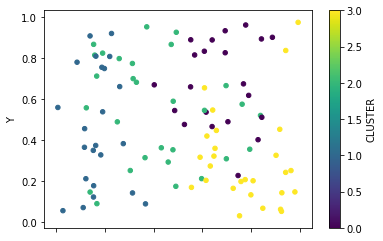

In [231]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(toy_data.values)
toy_data["CLUSTER"]=kmeans.labels_
toy_data.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis')


On the above plot we can see that the clustering is dominated by X again. Because there are 3 features that sort of describe the same thing, Euclidean distance works as if X matters 3 times as much as Y!

The solution to this problem is dimensionality reduction. The most important takeaway of this analysis is that Clustering with Euclidean distance function can only be properly done on a dataset with orthogonal features that have the same variance. Otherwise the clusterer will not find the patterns that we are looking for!

Text(0.5, 1.0, 'ORIGINAL DATA')

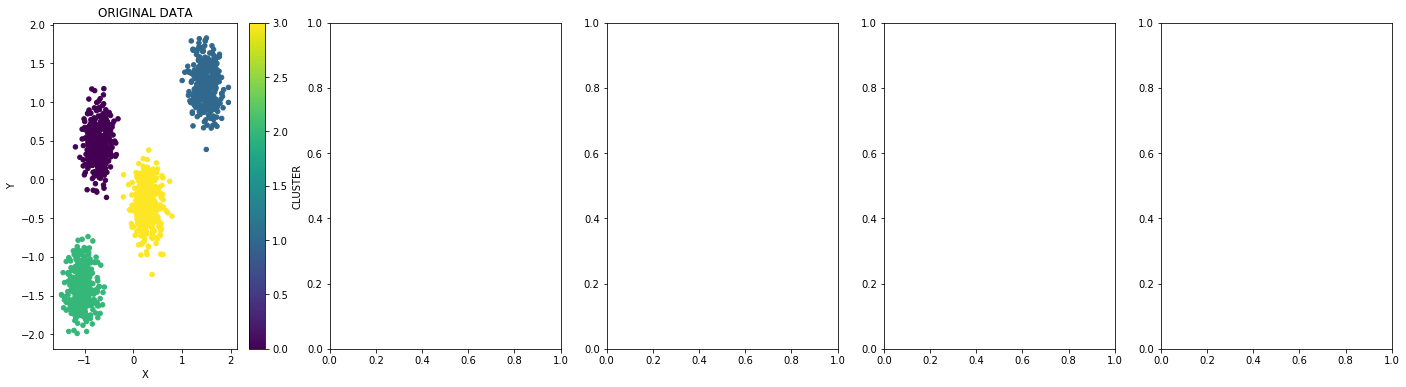

In [232]:
#first, original data
X, y = datasets.make_blobs(n_samples=1500,centers=4,random_state=9211134)
fig,axs=plt.subplots(1,5,figsize=(24,6))
X_pd=pd.DataFrame(X,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()

kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pd.values)

X_pd["CLUSTER"]=kmeans.labels_
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[0])
axs[0].set_title("ORIGINAL DATA")

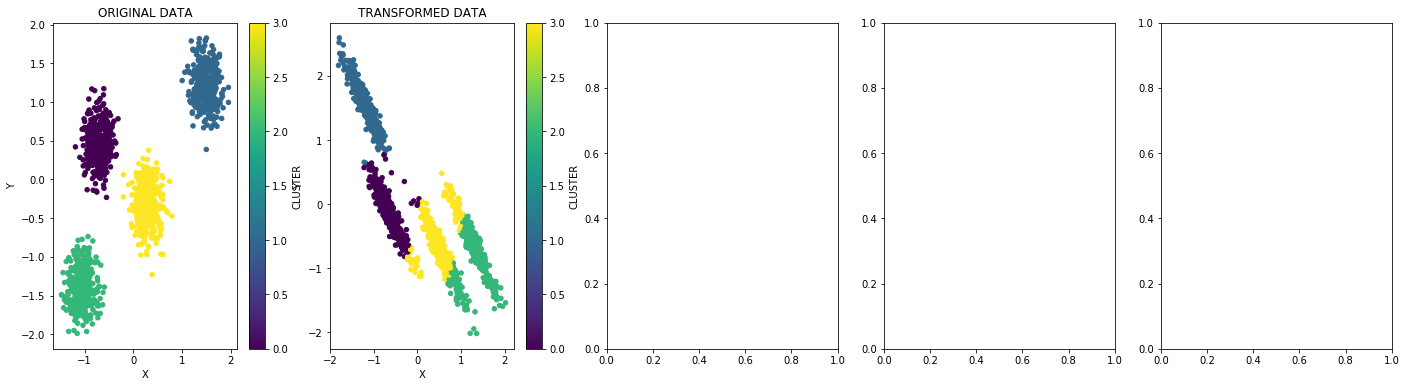

In [233]:
#normal state
#my next question: are we done? is this correct?
#maybe an example would help...
#okay, so what is wrong with all this?
#maybe an example will help

transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
X_pd=pd.DataFrame(X_aniso,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pd.values)

X_pd["CLUSTER"]=kmeans.labels_
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[1])
axs[1].set_title("TRANSFORMED DATA")
fig

Correlation is just one example which prompts some sort of dimensionality reduction. A linear transformation such as the above can also confuse our clusterer. 

There are two options that I ffrequently use: Principal Component Analysis and Factor analysis. I will not go into the details of the differences between the two, but I will say that both of these methods are sufficient for solving the problem. 

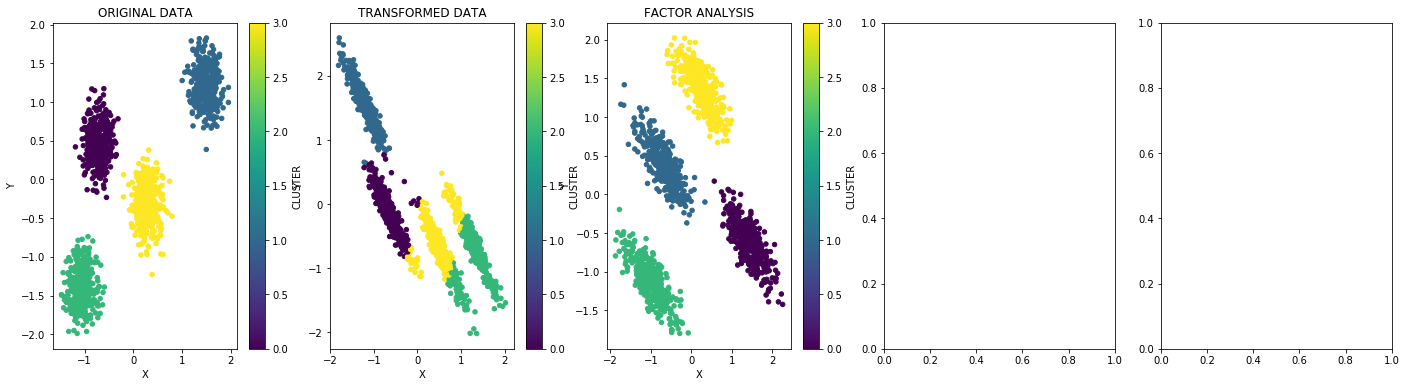

In [234]:
#first try factor analysis
transformer = FactorAnalysis(n_components=5, random_state=123456)
#inputData.drop("CLUSTERING_1",axis=1,inplace=True)
X_FA = transformer.fit_transform(X_aniso)

X_pd=pd.DataFrame(X_FA,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pd.values)

X_pd["CLUSTER"]=kmeans.labels_
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[2])
axs[2].set_title("FACTOR ANALYSIS")
fig

[0.91584495 0.08415505]


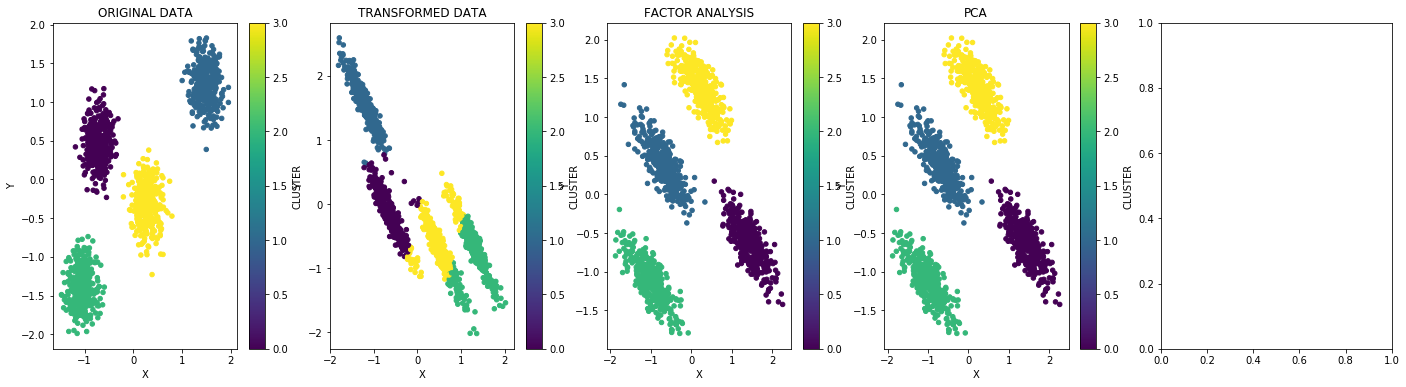

In [235]:
#next PCA

pca = PCA(n_components=2)
pca.fit(X_aniso)
print(pca.explained_variance_ratio_)
X_PCA=pca.fit_transform(X_aniso)
X_pd=pd.DataFrame(X_PCA,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()

kmeans = KMeans(n_clusters=4, random_state=0,max_iter=3000).fit(X_pd.values)

X_pd["CLUSTER"]=kmeans.labels_
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[3])
axs[3].set_title("PCA")
fig

Besides dimensionality reduction, we can also tinker with the distance function. In the last example I wil use Mahanabolis distance instead of Euclidean distance. Without going into the details too much, Mahanabolis "constructs a ruler" that is specific to the dataset, and takes care of both variance issues and correlations.

Thanks to László Kovács for this tip!

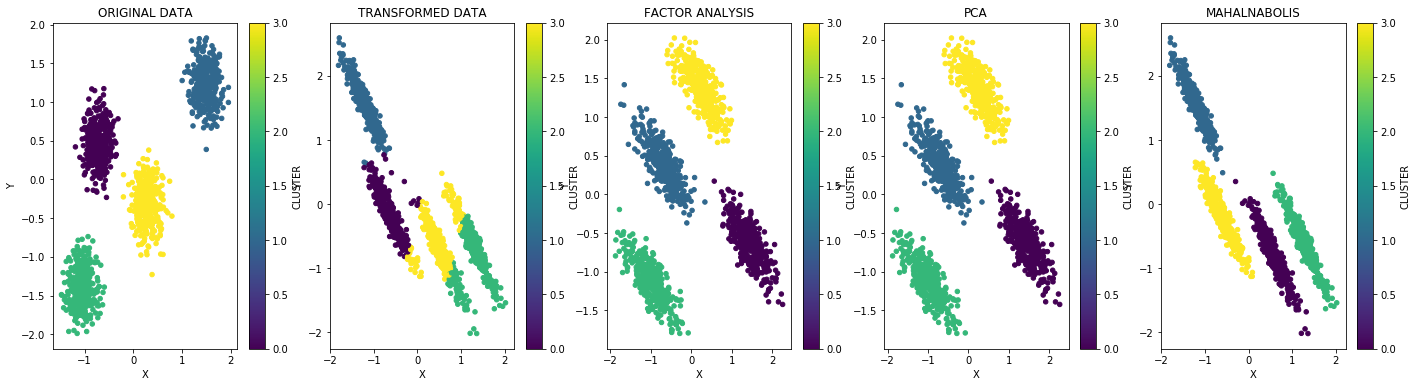

In [236]:
#dr kovács
clf = mixture.GaussianMixture(n_components=4, covariance_type='full')
X_pd=pd.DataFrame(X_aniso,columns=["X","Y"])
X_pd=(X_pd-X_pd.mean())/X_pd.std()

clf.fit(X_pd.values)
X_pd["CLUSTER"]=clf.predict(X_pd.values)
X_pd.plot.scatter(x="X",y="Y",c="CLUSTER",colormap='viridis',ax=axs[4])
axs[4].set_title("MAHALNABOLIS")
fig

## Back to our original data

I will use our findings to now correctly cluster the credit card dataset

In [237]:

pca = PCA(n_components=5)
pca.fit(inputDataNormalized.values)
print(pca.explained_variance_ratio_)
X_PCA=pca.fit_transform(inputDataNormalized[feature_columns].values)
X_PCA=(X_PCA-X_PCA.mean())/X_PCA.std()

kmeans = KMeans(n_clusters=5, random_state=0,max_iter=3000).fit(X_PCA)

inputDataNormalized["CLUSTERING_1"]=kmeans.labels_
inputDataNormalized["CLUSTERING_1"].value_counts()

[0.27297671 0.2031378  0.08813182 0.07479524 0.06224729]


0    3912
4    2986
2    1206
1     816
3      30
Name: CLUSTERING_1, dtype: int64

I used Principal Component Analysis. PCA deconstructs the dataset into orthogonal vectors, and can also tell us which features contribute to which vector. I also printed out the explained variances of each principal component. These numbers are always decreasing, and they describe how much of the original data is explained by each component.

In [238]:
principal_components=pd.DataFrame(pca.components_,index=np.arange(5),columns=feature_columns).transpose()
principal_components

,0,1,2,3,4
BALANCE,0.101735,0.403819,-0.161632,0.279316,0.051022
BALANCE_FREQUENCY,0.120490,0.131344,-0.422995,0.155762,-0.476836
PURCHASES,0.411562,0.040025,0.257474,0.041621,0.027887
ONEOFF_PURCHASES,0.346334,0.061918,0.390899,0.085079,-0.160839
INSTALLMENTS_PURCHASES,0.336761,-0.019175,-0.109268,-0.057915,0.361402
CASH_ADVANCE,-0.022810,0.439027,-0.023128,-0.256596,0.097560
PURCHASES_FREQUENCY,0.321232,-0.191148,-0.371394,-0.194564,-0.099668
ONEOFF_PURCHASES_FREQUENCY,0.294493,-0.018561,0.115565,0.034279,-0.540330
PURCHASES_INSTALLMENTS_FREQUENCY,0.274494,-0.178869,-0.469579,-0.225288,0.176996
CASH_ADVANCE_FREQUENCY,-0.088582,0.434121,-0.104709,-0.264628,-0.145160


Looking at these numbers can be confusing. My favorite way of seeing the results of PCA is to create a heatmap from this dataframe. Notice that the dataframe is sorted according to the first principal component. 

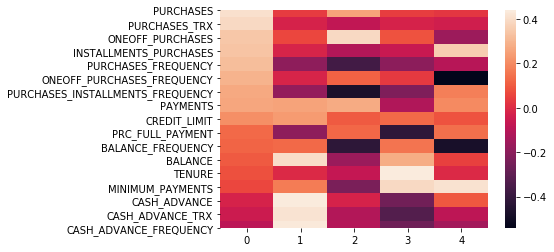

In [239]:
ax = sns.heatmap(principal_components.sort_values(0,ascending=False))

Based on this heatmap we can give each component a substantive meaning. This is a very important step! As long as the components make substantive sense, you know you did your job well. 

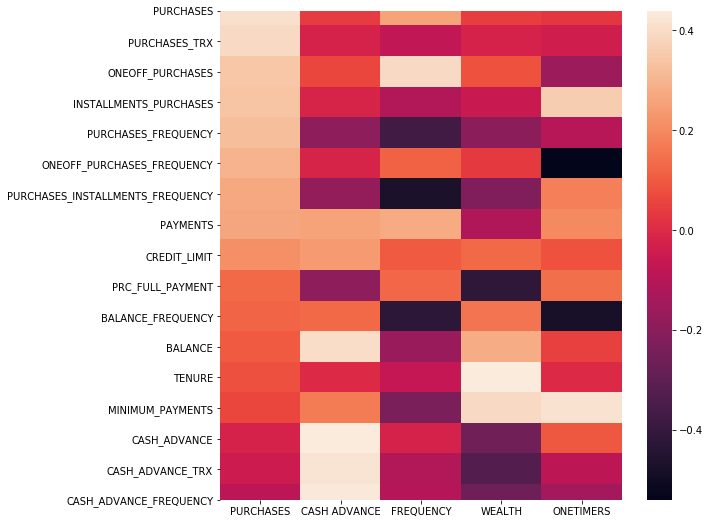

In [240]:
#lets name components!
component_names=["PURCHASES","CASH ADVANCE","FREQUENCY","WEALTH","ONETIMERS"]
principal_components.columns=component_names
fig,axes=plt.subplots(1,1,figsize=(9,9))
axes = sns.heatmap(principal_components.sort_values("PURCHASES",ascending=False),ax=axes)

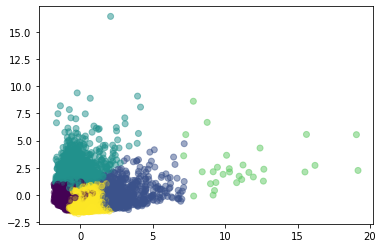

In [241]:
inputDataNormalizedFactorized=pd.DataFrame(X_PCA,columns=component_names)
inputDataNormalizedFactorized["CLUSTERING_1"]=kmeans.labels_
plt.scatter(inputDataNormalizedFactorized["PURCHASES"],
            inputDataNormalizedFactorized["CASH ADVANCE"],c=inputDataNormalizedFactorized["CLUSTERING_1"],alpha=0.5)


So Something is still wrong! We did not account for the skewness of our variables! Long tail varables usually have a high variance, and this also confuses our KMeans algorithm. My choice to remove the skewness in this case is to take the logarithm of the features. This works well in cases when all of the observations are positive, and when they span different orders of magnitude. 

In [242]:
inputData.drop("CLUSTERING_1",inplace=True,axis=1)


In [243]:
inputData.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522636
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.852446
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [244]:
#from this we cansee that we still didnt find the right function  form
#exponentially distributed features must be LOGnormalized in order to get good separation
#select exponentially distributed features
to_be_logged_list=list(inputData.skew()[inputData.skew()>1].index)
for col in to_be_logged_list:
    print(col)
    inputData[col]=np.log(inputData[col]+1)
    

BALANCE
PURCHASES
ONEOFF_PURCHASES
INSTALLMENTS_PURCHASES
CASH_ADVANCE
ONEOFF_PURCHASES_FREQUENCY
CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_TRX
PURCHASES_TRX
CREDIT_LIMIT
PAYMENTS
MINIMUM_PAYMENTS
PRC_FULL_PAYMENT


Interpreting. If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. ... If skewness is less than −1 or greater than +1, the distribution is highly skewed

In [245]:
inputData.skew()

BALANCE                            -0.861021
BALANCE_FREQUENCY                  -2.023266
PURCHASES                          -0.764492
ONEOFF_PURCHASES                    0.185854
INSTALLMENTS_PURCHASES             -0.024981
CASH_ADVANCE                        0.262594
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          1.290617
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
CASH_ADVANCE_FREQUENCY              1.455462
CASH_ADVANCE_TRX                    0.940131
PURCHASES_TRX                       0.032697
CREDIT_LIMIT                       -0.101408
PAYMENTS                           -1.778312
MINIMUM_PAYMENTS                    0.269703
PRC_FULL_PAYMENT                    1.746046
TENURE                             -2.943017
dtype: float64

In [246]:
inputData.replace(np.nan,0,inplace=True)

In [254]:
#and now we can do the correct analysis
#step 1: logarithm
#step 2:  standardize
inputDataNormalized=(inputData-inputData.mean())/inputData.std()
inputData=(inputData-inputData.mean())/inputData.std()

#step 3: PCA

pca = PCA(n_components=5)
pca.fit(inputDataNormalized.values)
print(pca.explained_variance_ratio_)
X_PCA=pca.fit_transform(inputDataNormalized[feature_columns].values)
X_PCA=(X_PCA-X_PCA.mean())/X_PCA.std()

kmeans = KMeans(n_clusters=5, random_state=0,max_iter=3000).fit(X_PCA)

inputDataNormalized["CLUSTERING_1"]=kmeans.labels_
inputDataNormalized["CLUSTERING_1"].value_counts()

[0.34182673 0.22082983 0.09512385 0.07372014 0.06633416]


2    2313
3    1893
0    1873
1    1527
4    1344
Name: CLUSTERING_1, dtype: int64

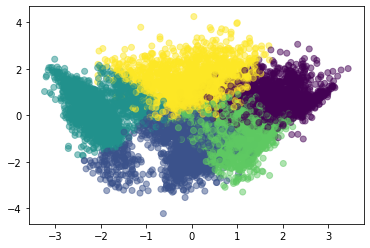

In [255]:
inputDataNormalizedFactorized=pd.DataFrame(X_PCA,columns=component_names)
inputDataNormalizedFactorized["CLUSTERING_1"]=kmeans.labels_
inputDataNormalized["CLUSTERING_1"]=kmeans.labels_

plt.scatter(inputDataNormalizedFactorized["PURCHASES"],
            inputDataNormalizedFactorized["CASH ADVANCE"],c=inputDataNormalizedFactorized["CLUSTERING_1"],alpha=0.5)


Roughly Equal cluster sizes and great separation. This is what we wanted!

The last thing to do is to give some substantive meaning to the clusters. We can use the boxplots to do that. Note that I fitted the clusterer on the dekewed, factorized data, but I plot the original here.

C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds
C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds
C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds
C:\Users\Akarpati\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:355: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds


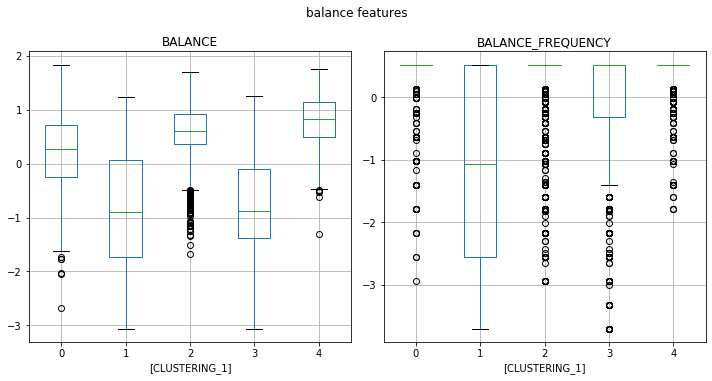

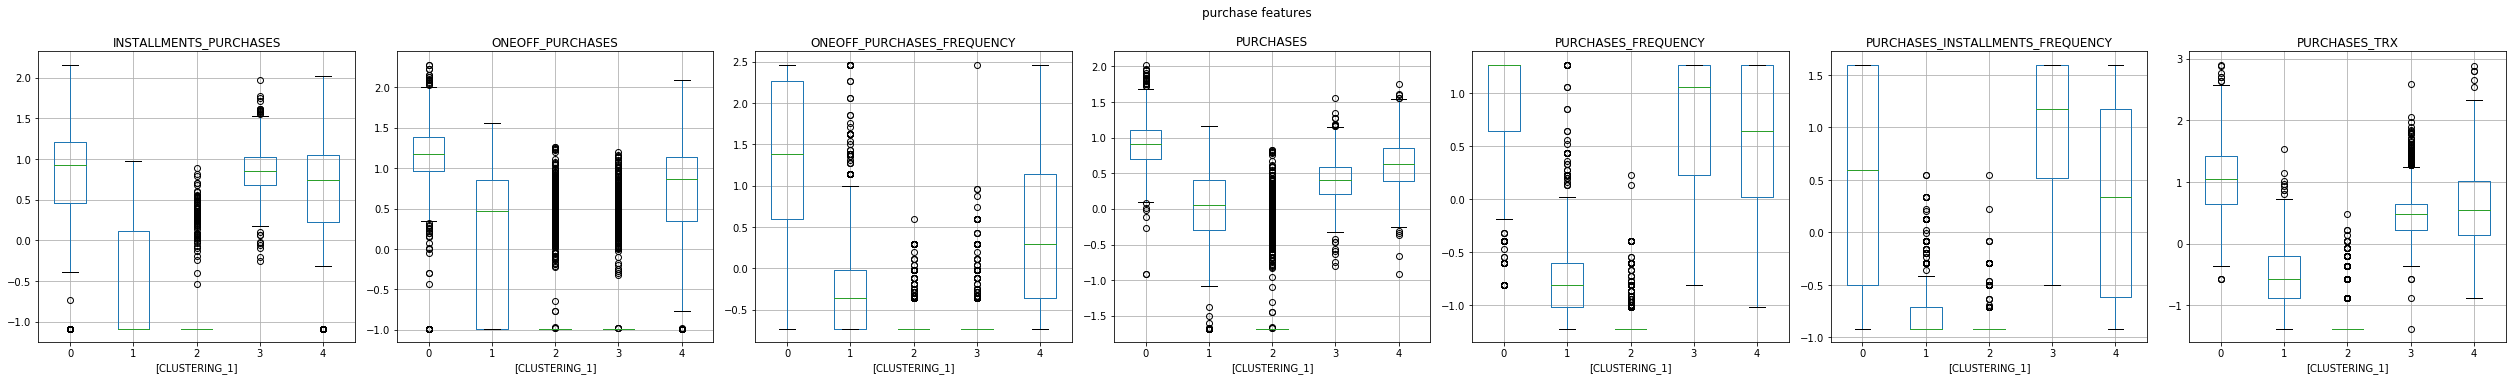

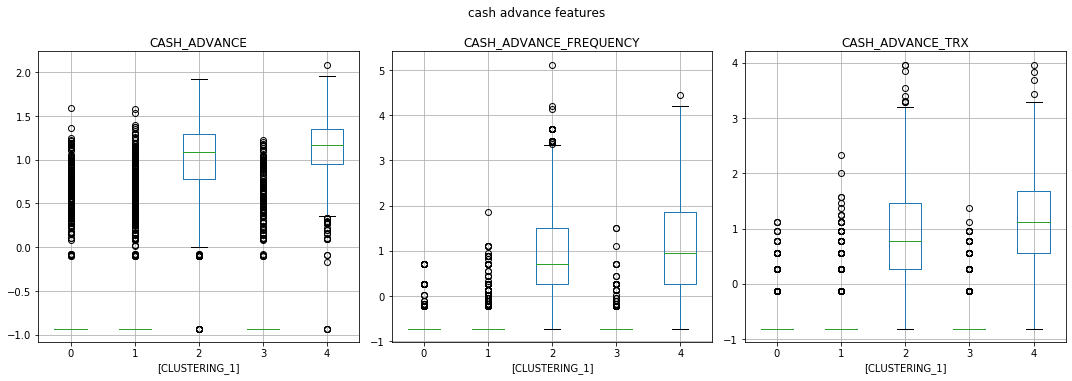

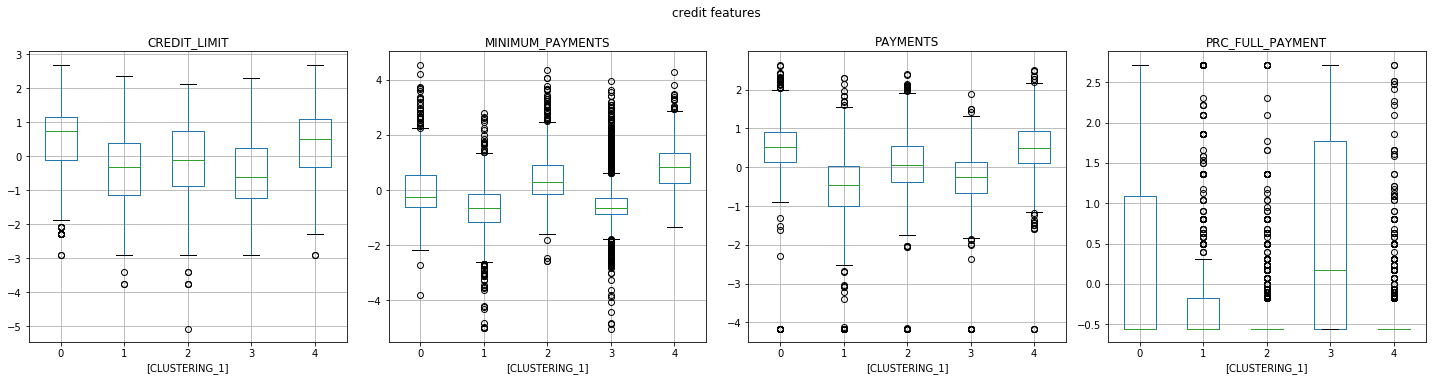

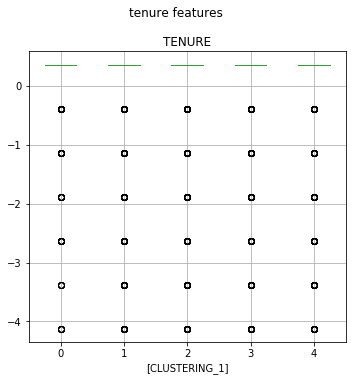

In [256]:
for name, group in feature_groups.items():
    create_boxplot_for_feature_group(group,name,inputDataNormalized)

### Cluster 0 - One-off Purchases
* Unordered list can use asterisks
- Or minuses
+ Or pluses

+ High Balance Frequency
+ High Balance
+ High Purchase Frequency
+ Low Cash Advance
+ One off Purchases
+ Always pays back

### Cluster 1 - The non-users
+ Low Balance
+ Low Balance Frequency
+ Low Purchases
+ Low Cash Advance
+ Low Probability of Repaying

### Cluster 2 - Cash Advance Users
+ High Balance
+ High Balance Frequency
+ Low Purchase Frequency
+ High Cash Advance

### Cluster 3 - Installment Purchases
+ Low Balance
+ Installment Purchases
+ No Cash Advance


### Cluster 4 - Cash Cows
+ Highest Balance
+ High Balance Frequency
+Rarely repays in full
+Cash Advance

In [404]:
#cluster 1
# low balance lower balance frequency
#high purchase frequency
#always pays back

#cluster 2
#low balance, LOW balance frequency
#very low purchases, low purchase frequency
#low payments

#cluster 3
#avg balance, high balance frequency
#highest purchases
#high credit limit, high purchases
#usually repays in full

#cluster 4
#high balance, high frequency
#NO purchases
#frequent cash  advance
#never repays
#
cluster_names=["CONSCIOUS","LOW_ACTIVITY","BIG_SPENDERS","CASH_ADVANCE","ONEOFF_CASH_ADVANCE"]
#and now go make a ppt
#thanks you!